# Linear support vector classifier
This example is based on a [SciKit Learn Support Vector machine example](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py).

The example shows how SciKit Learn can be used to produce a hyper-plane (in this case a line) to separate the points, so unseen data can be classified.  

Import required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

Define constants:

In [2]:
FILENAME = "data/groups.csv"
PLOT1 = "groups1.png"
PLOT2 = "groups2.png"

Import data:

In [3]:
df = pd.read_csv(FILENAME)
df.head()

,x,y,Class
0,5.746683,5.395577,1
1,1.556187,1.200949,-1
2,6.215464,6.065553,1
3,1.025627,1.815120,-1
4,5.829460,5.805741,1


Define relevant features and labels:

In [4]:
X = df[['x','y']]
Y = df['Class']

Split the data into test and training data, and mark the training data with a colour.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, shuffle = True)
train_colour= np.where(y_train==1, 'r', 'b')

Plot the training data:

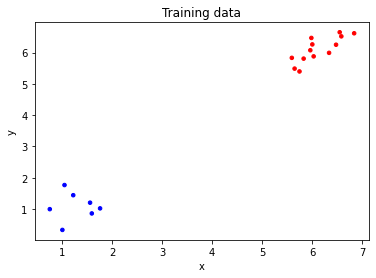

In [6]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training data')
plt.scatter(x_train['x'], x_train['y'], s=50, c=train_colour, marker = '.')

plt.savefig(PLOT1)
plt.show()

Use SciKit Learn to set up the kernel model:

In [7]:
clf = svm.SVC(kernel="linear", gamma=2)
clf.fit(x_train, y_train)

SVC(gamma=2, kernel='linear')

Use the support vector to make a prediction:

In [8]:
y_pred = clf.predict(x_test)
pred_colour= np.where(y_pred==1, 'r', 'b')

Plot out the separating hyperplane and the predicted results:

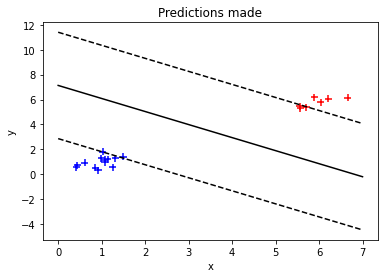

In [9]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions made')
plt.scatter(x_test['x'], x_test['y'], s=50, c=pred_colour, marker = '+'  )
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 7)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")
plt.savefig(PLOT2)
plt.show()